# Standardization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('wine_data.csv',usecols=[0,1,2])
df.sample(5)

,1,14.23,1.71
107,2,12.22,1.29
83,2,11.84,0.89
46,1,13.90,1.68
139,3,12.93,2.81
163,3,13.78,2.76


In [7]:
df.columns=['class_label','Alchole','Malic_acid']

In [8]:
df.sample(5)

,class_label,Alchole,Malic_acid
142,3,13.62,4.95
173,3,13.40,3.91
87,2,11.64,2.06
2,1,14.37,1.95
109,2,11.46,3.74


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('class_label',axis=1),df['class_label'],test_size=0.3,random_state=0)
x_train.shape,x_test.shape

((123, 2), (54, 2))

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(x_train)

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [30]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)
np.round(x_train_scaled.describe(),1)

,Alchole,Malic_acid
count,123.0,123.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


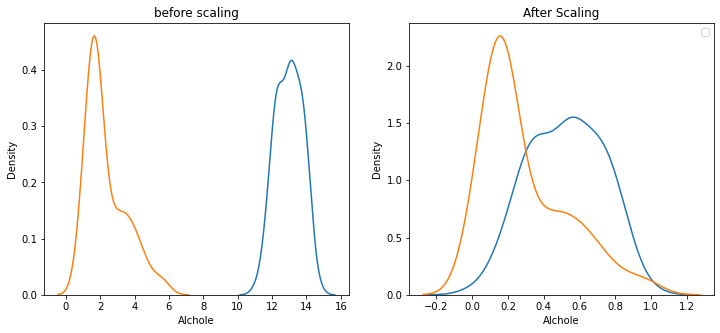

In [64]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.set_title('before scaling')
sns.kdeplot(x=x_train['Alchole'],ax=ax1)
sns.kdeplot(x=x_train['Malic_acid'],ax=ax1)
ax2.set_title('After Scaling')
sns.kdeplot(x=x_train_scaled['Alchole'],ax=ax2)
sns.kdeplot(x=x_train_scaled['Malic_acid'],ax=ax2)

Text(0.5, 1.0, 'After Scaling')

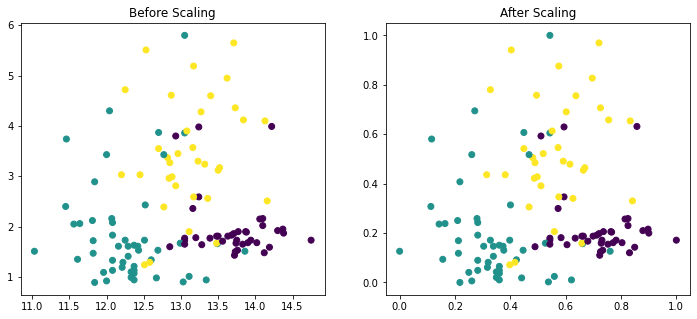

In [57]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

ax1.scatter(x_train['Alchole'],x_train['Malic_acid'],c=y_train)
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Alchole'],x_train_scaled['Malic_acid'],c=y_train)
ax2.set_title('After Scaling')